In [1]:
# imports
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# loading data set
words = open('names.txt', 'r').read().splitlines()
words[:8]

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']

In [3]:
len(words)

32033

In [9]:
#build the vocabulary of characters and mappings to/from integers
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}
print(stoi)

{'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e': 5, 'f': 6, 'g': 7, 'h': 8, 'i': 9, 'j': 10, 'k': 11, 'l': 12, 'm': 13, 'n': 14, 'o': 15, 'p': 16, 'q': 17, 'r': 18, 's': 19, 't': 20, 'u': 21, 'v': 22, 'w': 23, 'x': 24, 'y': 25, 'z': 26, '.': 0}


In [13]:
# build the dataset

block_size = 3 # context length: how many characters do we take to predict the next one?
X, Y = [], [] # X is input to neural net. Y is label for each input
for w in words[:5]:
    
    print(w)
    context = [0] * block_size # create padded context of Zero tokens
    for ch in w + '.': # concat . token to end of word and iterate through charcters
        ix = stoi[ch] # assign index of ch to variable ix
        X.append(context) # append context to input X
        Y.append(ix) # append index of ch to labels Y
        print(''.join(itos[i] for i in context), '--->', itos[ix])
        context = context[1:] + [ix] # crop and append

X = torch.tensor(X)
Y = torch.tensor(Y)

emma
... ---> e
..e ---> m
.em ---> m
emm ---> a
mma ---> .
olivia
... ---> o
..o ---> l
.ol ---> i
oli ---> v
liv ---> i
ivi ---> a
via ---> .
ava
... ---> a
..a ---> v
.av ---> a
ava ---> .
isabella
... ---> i
..i ---> s
.is ---> a
isa ---> b
sab ---> e
abe ---> l
bel ---> l
ell ---> a
lla ---> .
sophia
... ---> s
..s ---> o
.so ---> p
sop ---> h
oph ---> i
phi ---> a
hia ---> .


In [15]:
C = torch.randn((27, 2))

In [16]:
C[5]

tensor([0.3761, 0.1463])

In [19]:
F.one_hot(torch.tensor(5), num_classes=27).float() @ C

tensor([0.3761, 0.1463])

Indexing into the column is equivalent to taking the dot product of our lookup table C, with the one hot encoded values

PyTorch indexing is very powerful. We can index with a list, or even with a multi-dimensional tensor

In [22]:
X[13, 2]

tensor(1)

In [21]:
C[X]

tensor([[[-1.1240,  0.4039],
         [-1.1240,  0.4039],
         [-1.1240,  0.4039]],

        [[-1.1240,  0.4039],
         [-1.1240,  0.4039],
         [ 0.3761,  0.1463]],

        [[-1.1240,  0.4039],
         [ 0.3761,  0.1463],
         [-0.0346,  0.2040]],

        [[ 0.3761,  0.1463],
         [-0.0346,  0.2040],
         [-0.0346,  0.2040]],

        [[-0.0346,  0.2040],
         [-0.0346,  0.2040],
         [-1.1314, -0.0225]],

        [[-1.1240,  0.4039],
         [-1.1240,  0.4039],
         [-1.1240,  0.4039]],

        [[-1.1240,  0.4039],
         [-1.1240,  0.4039],
         [-0.1324,  0.3031]],

        [[-1.1240,  0.4039],
         [-0.1324,  0.3031],
         [ 0.5928,  0.6920]],

        [[-0.1324,  0.3031],
         [ 0.5928,  0.6920],
         [ 0.1455,  0.3944]],

        [[ 0.5928,  0.6920],
         [ 0.1455,  0.3944],
         [-0.0132, -0.2061]],

        [[ 0.1455,  0.3944],
         [-0.0132, -0.2061],
         [ 0.1455,  0.3944]],

        [[-0.0132, -0

In [23]:
C[X][13, 2]

tensor([-1.1314, -0.0225])

In [24]:
C[1]

tensor([-1.1314, -0.0225])

Notice that these are equivalent

In [25]:
# This is our embedding
emb = C[X]
emb.shape

torch.Size([32, 3, 2])

In [27]:
# Creating our weights and biases
# Weights are 6x100. 6 because our output from embedding is 3x2=6, so there are 6 inputs to this hidden layer. 100 neurons has been chosen randomly.
# We also instantiate 100 biases to match our 100 weights
W1 = torch.randn((6, 100))
b1 = torch.randn(100)

In [29]:
# torch.cat concats tensors. takes a positional argument for which dimension to concat on. cat is an inefficient operation
# this works, but if we change our block size this would break and we'd need to add more arguments to concat. lets try torch.unbind
torch.cat([emb[:, 0, :], emb[:, 1, :], emb[:, 2, :]], 1)

tensor([[-1.1240,  0.4039, -1.1240,  0.4039, -1.1240,  0.4039],
        [-1.1240,  0.4039, -1.1240,  0.4039,  0.3761,  0.1463],
        [-1.1240,  0.4039,  0.3761,  0.1463, -0.0346,  0.2040],
        [ 0.3761,  0.1463, -0.0346,  0.2040, -0.0346,  0.2040],
        [-0.0346,  0.2040, -0.0346,  0.2040, -1.1314, -0.0225],
        [-1.1240,  0.4039, -1.1240,  0.4039, -1.1240,  0.4039],
        [-1.1240,  0.4039, -1.1240,  0.4039, -0.1324,  0.3031],
        [-1.1240,  0.4039, -0.1324,  0.3031,  0.5928,  0.6920],
        [-0.1324,  0.3031,  0.5928,  0.6920,  0.1455,  0.3944],
        [ 0.5928,  0.6920,  0.1455,  0.3944, -0.0132, -0.2061],
        [ 0.1455,  0.3944, -0.0132, -0.2061,  0.1455,  0.3944],
        [-0.0132, -0.2061,  0.1455,  0.3944, -1.1314, -0.0225],
        [-1.1240,  0.4039, -1.1240,  0.4039, -1.1240,  0.4039],
        [-1.1240,  0.4039, -1.1240,  0.4039, -1.1314, -0.0225],
        [-1.1240,  0.4039, -1.1314, -0.0225, -0.0132, -0.2061],
        [-1.1314, -0.0225, -0.0132, -0.2

In [31]:
# torch.unbind removes a tensor dimension. it returns a tuple of all slices along this dimension, without it. this method is insensitive to changes in block size
torch.cat(torch.unbind(emb, 1), 1)

tensor([[-1.1240,  0.4039, -1.1240,  0.4039, -1.1240,  0.4039],
        [-1.1240,  0.4039, -1.1240,  0.4039,  0.3761,  0.1463],
        [-1.1240,  0.4039,  0.3761,  0.1463, -0.0346,  0.2040],
        [ 0.3761,  0.1463, -0.0346,  0.2040, -0.0346,  0.2040],
        [-0.0346,  0.2040, -0.0346,  0.2040, -1.1314, -0.0225],
        [-1.1240,  0.4039, -1.1240,  0.4039, -1.1240,  0.4039],
        [-1.1240,  0.4039, -1.1240,  0.4039, -0.1324,  0.3031],
        [-1.1240,  0.4039, -0.1324,  0.3031,  0.5928,  0.6920],
        [-0.1324,  0.3031,  0.5928,  0.6920,  0.1455,  0.3944],
        [ 0.5928,  0.6920,  0.1455,  0.3944, -0.0132, -0.2061],
        [ 0.1455,  0.3944, -0.0132, -0.2061,  0.1455,  0.3944],
        [-0.0132, -0.2061,  0.1455,  0.3944, -1.1314, -0.0225],
        [-1.1240,  0.4039, -1.1240,  0.4039, -1.1240,  0.4039],
        [-1.1240,  0.4039, -1.1240,  0.4039, -1.1314, -0.0225],
        [-1.1240,  0.4039, -1.1314, -0.0225, -0.0132, -0.2061],
        [-1.1314, -0.0225, -0.0132, -0.2

In [40]:
# Tensor.view() is an extremely efficient way to maniuplate tensor dimensions without actually modifying memory. 
# It utilizes underlying attributes of the tensor object in order to change the way a tensor is represented.
a = torch.arange(18)
display(a.storage()) # tensors are stored in memory as a list of their values
a.view(2,9), a.view(2,9), a.view(3,3,2)

C:\Users\Kevin\AppData\Local\Temp\ipykernel_14592\2466038042.py:4: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  display(a.storage())
c:\Users\Kevin\anaconda3\lib\site-packages\IPython\lib\pretty.py:700: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  output = repr(obj)
c:\Users\Kevin\anaconda3\lib\site-packages\torch\storage.py:645: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages di

 0
 1
 2
 3
 4
 5
 6
 7
 8
 9
 10
 11
 12
 13
 14
 15
 16
 17
[torch.storage.TypedStorage(dtype=torch.int64, device=cpu) of size 18]

(tensor([[ 0,  1,  2,  3,  4,  5,  6,  7,  8],
         [ 9, 10, 11, 12, 13, 14, 15, 16, 17]]),
 tensor([[ 0,  1,  2,  3,  4,  5,  6,  7,  8],
         [ 9, 10, 11, 12, 13, 14, 15, 16, 17]]),
 tensor([[[ 0,  1],
          [ 2,  3],
          [ 4,  5]],
 
         [[ 6,  7],
          [ 8,  9],
          [10, 11]],
 
         [[12, 13],
          [14, 15],
          [16, 17]]]))

In [44]:
# tensor.view() just so happens to manipulate the shape of the tensor in the way we desire
# Using -1 to avoid hardcoding. We could equivalently use emb.shape[0]. PyTorch is smart enough to derive the necessary value to make the operation work using the second value of 6
# We use tanh here to transfrom all values in the resulting tesnor to be between -1 and 1
# **It's good practice to always double check that the broadcasting operation taking place (+) works as we expect it to!
h = torch.tanh(emb.view(-1, 6) @ W1 + b1)

In [45]:
h.shape

torch.Size([32, 100])

In [46]:
W2 = torch.randn((100, 27))
b2 = torch.randn(27)
logits = h @ W2 + b2

In [48]:
logits.shape

torch.Size([32, 27])

In [49]:
counts = logits.exp()
prob = counts / counts.sum(1, keepdims=True)

In [52]:
prob.shape

torch.Size([32, 27])

In [59]:
# negative log loss likelihood
loss = -prob[torch.arange(len(Y)), Y].log().mean()
loss

tensor(15.7092)

#### Here is the above code rewritten and condensed:

In [88]:
# build the dataset

block_size = 3 # context length: how many characters do we take to predict the next one?
X, Y = [], [] # X is input to neural net. Y is label for each input
for w in words:
    
    context = [0] * block_size # create padded context of Zero tokens
    for ch in w + '.': # concat . token to end of word and iterate through charcters
        ix = stoi[ch] # assign index of ch to variable ix
        X.append(context) # append context to input X
        Y.append(ix) # append index of ch to labels Y
        context = context[1:] + [ix] # crop and append

X = torch.tensor(X)
Y = torch.tensor(Y)

#### Build the dataset with train/val/test splits

In [350]:
def build_dataset(words):
    block_size = 3 # context length: how many characters do we take to predict the next one?
    X, Y = [], [] # X is input to neural net. Y is label for each input
    for w in words:
        
        context = [0] * block_size # create padded context of Zero tokens
        for ch in w + '.': # concat . token to end of word and iterate through charcters
            ix = stoi[ch] # assign index of ch to variable ix
            X.append(context) # append context to input X
            Y.append(ix) # append index of ch to labels Y
            context = context[1:] + [ix] # crop and append

    X = torch.tensor(X)
    Y = torch.tensor(Y)
    print(X.shape, Y.shape)
    return X, Y

import random
random.seed(42)
random.shuffle(words)
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))

Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xte, Yte = build_dataset(words[n2:])

torch.Size([182441, 3]) torch.Size([182441])
torch.Size([22902, 3]) torch.Size([22902])
torch.Size([22803, 3]) torch.Size([22803])


In [430]:
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27, 10), generator=g)
W1 = torch.randn((30, 200), generator=g)
b1 = torch.randn(200, generator=g)
W2 = torch.randn((200, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2] # to count total parameters

In [431]:
sum(p.nelement() for p in parameters)

11897

In [432]:
# # F.cross_entropy()
# emb = C[X] # (32, 3, 2)
# h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # (32, 100)
# logits = h @ W2 + b2 # (32, 27)
# # counts = logits.exp()
# # prob = counts / counts.sum(1, keepdims=True)
# # loss = -prob[torch.arange(32), Y].log().mean()

# # ^^^ THIS IS THE SAME AS THE ABOVE ^^^
# # F.cross_entropy is much more computationally efficient as it does compound operations rather than multiple individual operations.
# # In addition, it makes back-propagation much more efficient for the same reasons
# loss = F.cross_entropy(logits, Y)
# loss

In [433]:
for p in parameters:
    p.requires_grad = True

In [434]:
lre = torch.linspace(-3, 0, 1000)
lrs = 10 ** lre

In [435]:
lri, lossi, stepi = [], [], []

In [436]:
for i in range(200000):
    # construct minibatch
    ix = torch.randint(0, Xtr.shape[0], (32,))

    # forward pass
    emb = C[Xtr[ix]] # (32, 3, 2)
    h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 100)
    logits = h @ W2 + b2 # (32, 27)
    loss = F.cross_entropy(logits, Ytr[ix])
    # print(loss.item())

    # backward pass
    for p in parameters:
        p.grad = None
    loss.backward()

    # update
    lr = 0.1 if i < 100000 else 0.01
    for p in parameters:
        p.data += -lr * p.grad

    # track stats
    stepi.append(i)
    lossi.append(loss.log10().item())

# print(loss.item())

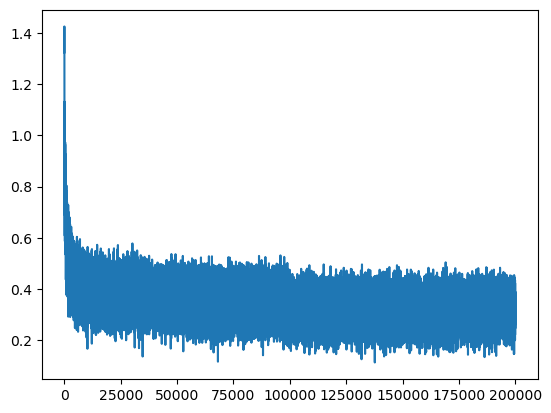

In [437]:
plt.plot(stepi, lossi);

In [438]:
    emb = C[Xtr] # (32, 3, 2)
    h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 100)
    logits = h @ W2 + b2 # (32, 27)
    loss = F.cross_entropy(logits, Ytr)
    loss.item()

2.1122851371765137

In [439]:
    emb = C[Xdev] # (32, 3, 2)
    h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 100)
    logits = h @ W2 + b2 # (32, 27)
    loss = F.cross_entropy(logits, Ydev)
    loss.item()

2.160743236541748

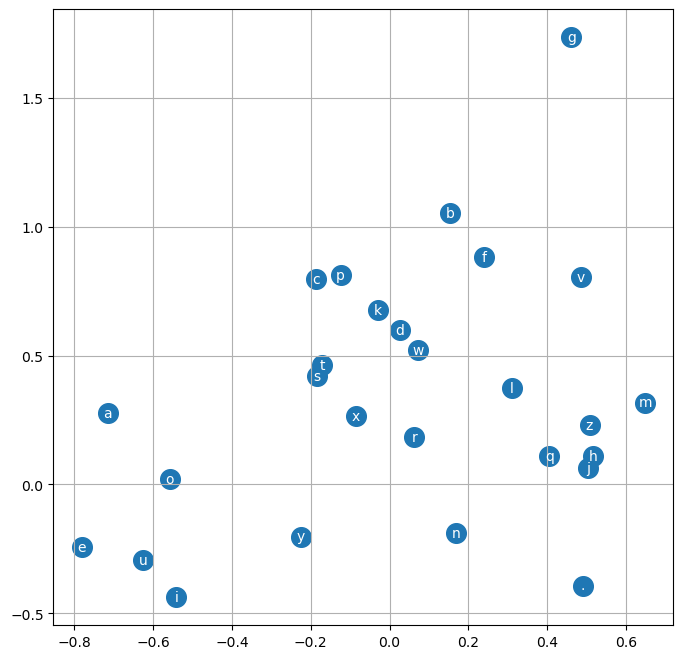

In [383]:
plt.figure(figsize=(8,8))
plt.scatter(C[:,0].data, C[:,1].data, s=200)
for i in range(C.shape[0]):
    plt.text(C[i,0].item(), C[i,1].item(), itos[i], ha="center", va="center", color="white")
plt.grid('minor');

#### Let's sample from the model!

In [440]:
g = torch.Generator().manual_seed(2147483647 + 10)

for _ in range(20):
    out = []
    context = [0] * block_size # initialize with all '...'
    while True:
        emb = C[torch.tensor([context])] # (1, block_size, d)
        h = torch.tanh(emb.view(1, -1) @ W1 + b1)
        logits = h @ W2 + b2
        probs = F.softmax(logits, dim=1)
        ix = torch.multinomial(probs, num_samples=1, generator=g).item()
        context = context[1:] + [ix]
        out.append(ix)
        if ix == 0:
            break
    print(''.join(itos[i] for i in out))

moha.
mayah.
seel.
nihah.
larethrus.
jernee.
adejadielin.
shy.
jen.
eden.
sananaraelyn.
malaia.
nyson.
mogiagriel.
kindreelynn.
nohana.
uma.
ged.
ryyah.
faeh.


#### Next step is to modify hyperparameters in order to improve on the log loss!